In [4]:
!pip3 install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 20.9 MB/s eta 0:00:00


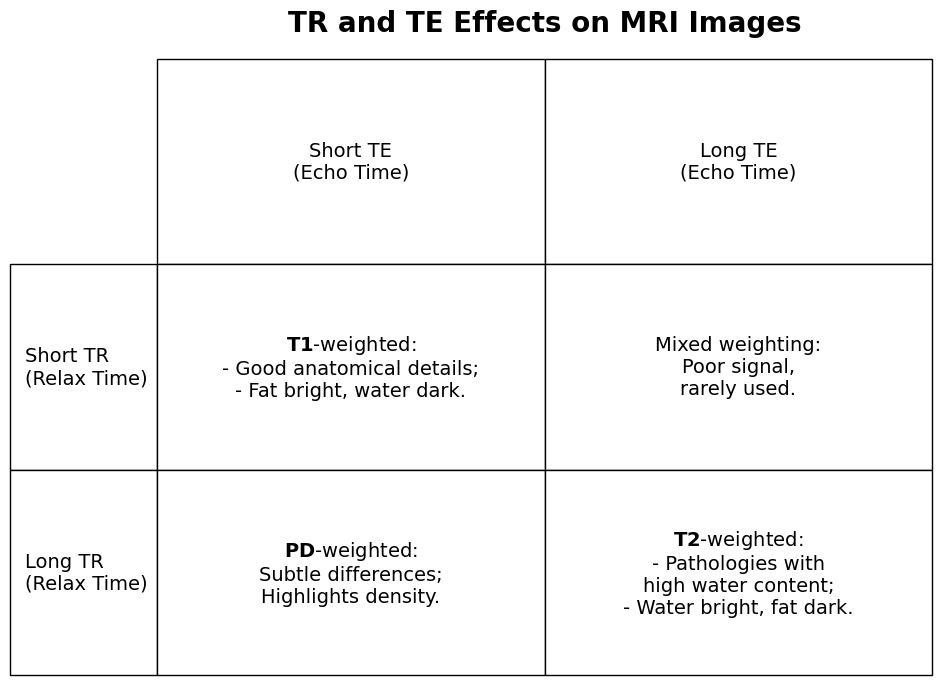

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Data with LaTeX-style formatting for bolding specific text
data = {
    "Short TE": [
        r"$\mathbf{T1}$-weighted:"+"\n- Good anatomical details;\n- Fat bright, water dark.",
        r"$\mathbf{PD}$-weighted:"+"\nSubtle differences;\nHighlights density."
    ],
    "Long TE": [
        "Mixed weighting:\nPoor signal,\nrarely used.",
        r"$\mathbf{T2}$-weighted:"+"\n- Pathologies with\nhigh water content;\n- Water bright, fat dark."
    ]
}

index = ["Short TR\n(Relax Time)", "Long TR\n(Relax Time)"]

# Create a DataFrame
df = pd.DataFrame(data, index=index)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis("tight")
ax.axis("off")

# Create the table with adjusted row and column height
table = ax.table(
    cellText=df.values,
    rowLabels=df.index,
    colLabels=["Short TE\n(Echo Time)", "Long TE\n(Echo Time)"],
    loc="center",
    cellLoc="center",
    bbox=[0, 0, 1, 1]  # Adjusts the table to fit better
)

# Adjusting font size and enabling bold for specific text
table.auto_set_font_size(False)
table.set_fontsize(14)
for key, cell in table.get_celld().items():
    cell.set_height(0.3)  # Increase the height of each cell for better spacing
    cell.set_text_props(fontproperties={"size": 14})  # Ensure font consistency

# Add title
plt.title("TR and TE Effects on MRI Images", fontsize=20, weight="bold", pad=20)
plt.show()


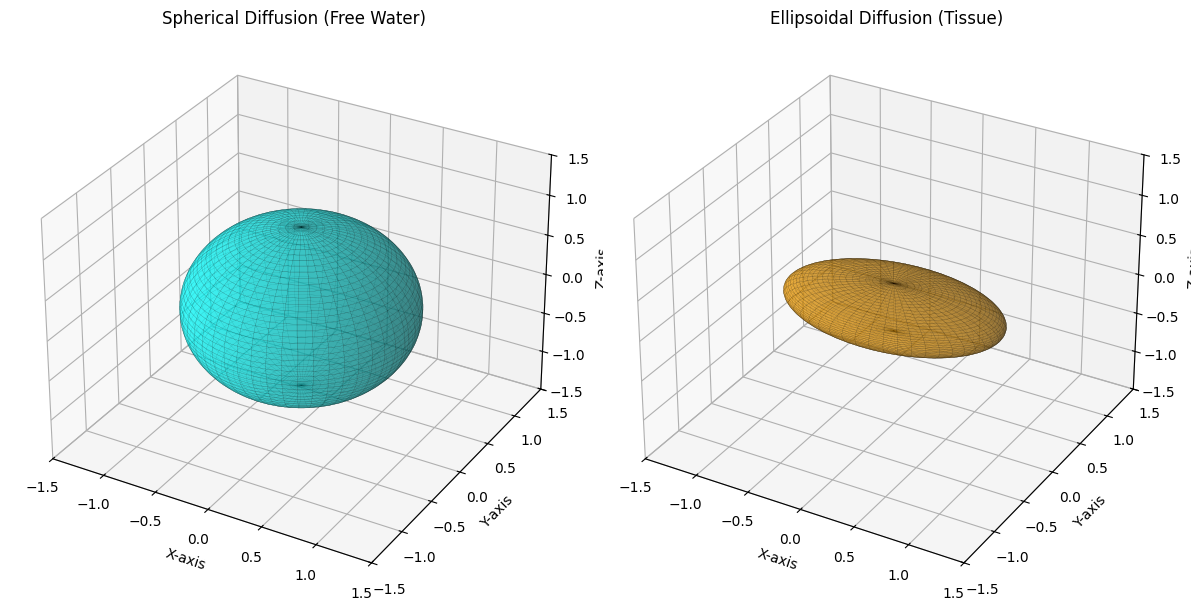

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot an ellipsoid (for Diffusion Tensor Visualization)
def plot_ellipsoid(ax, radii, center=(0, 0, 0), color='b', alpha=0.5):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radii[0] * np.outer(np.cos(u), np.sin(v)) + center[0]
    y = radii[1] * np.outer(np.sin(u), np.sin(v)) + center[1]
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v)) + center[2]
    ax.plot_surface(x, y, z, color=color, alpha=alpha, edgecolor='k', linewidth=0.1)

# Create figure
fig = plt.figure(figsize=(12, 6))

# Subplot 1: Spherical Diffusion (Free Water)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("Spherical Diffusion (Free Water)", fontsize=12)
plot_ellipsoid(ax1, radii=[1, 1, 1], color='cyan')
ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_zlim([-1.5, 1.5])
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')

# Subplot 2: Ellipsoidal Diffusion (Tissue)
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Ellipsoidal Diffusion (Tissue)", fontsize=12)
plot_ellipsoid(ax2, radii=[1, 0.6, 0.3], color='orange')  # Anisotropic ellipsoid
ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([-1.5, 1.5])
ax2.set_zlim([-1.5, 1.5])
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Z-axis')

# Adjust layout and show
plt.tight_layout()
plt.show()
